### **Preamble**
Title: Diabetes

Author: Ashish Acharya

Email: ashishacharya0@gmail.com

Last Update: 2021-10-15

run: 10
accuracy: 0.75
run: 11
accuracy: 0.7395833333333334
run: 12
accuracy: 0.7434895833333334
run: 13
accuracy: 0.7421875
run: 14
accuracy: 0.7565104166666666
run: 15
accuracy: 0.7395833333333334
run: 16
accuracy: 0.74609375
run: 17
accuracy: 0.7447916666666666
run: 18
accuracy: 0.7395833333333334
run: 19
accuracy: 0.7395833333333334
run: 20
accuracy: 0.7421875


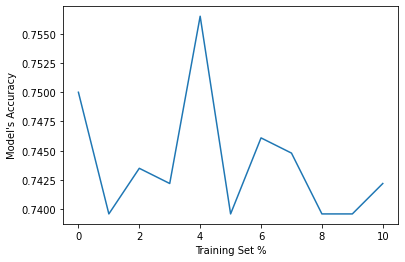

In [36]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Homework 06: ID3 algorithm (for decision trees)

import os, math, sys, random
import pandas as pd
from pandas.core.frame import DataFrame
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab_Datasets/diabetes/'
CSV_FILE_NAME   = 'diabetes.csv'

if __name__ == "__main__":
    df = pd.read_csv(os.path.join(DATA_FOLDER, CSV_FILE_NAME))
    runs = [ x for x in range(10, 21) ]
    accuracies = []


    for run in runs: 
        print('run:', run)
        
        random.seed(0)
    
        rows_train = random.sample(range(len(df)), k=int(len(df) * .3))
        
        df_train = pd.DataFrame(columns=df.columns)
        df_test = pd.DataFrame(columns=df.columns)
        for i, row in df.iterrows():
            if i in rows_train:
                df_train = df_train.append(row)
            else:
                df_test = df_test.append(row)

        df_test = df

        X = df_train.iloc[:,0:-1].values
        Y = df_train.iloc[:,-1].values
        model = DecisionTreeClassifier().fit(X, Y)
        #print(export_text(model, feature_names=list(df_train.columns[:-1])))

        correct = 0
        for _, row in df_test.iterrows():
            value_predict = model.predict([row[:-1].values])
            if value_predict == row['target']:
                correct += 1
        accuracy = correct/len(df_test.index)        
        print('accuracy:', accuracy)
        #storing in a list to print for next section
        accuracies.append(accuracy)

#END FOR ---------------------------------------------------------------------

    plt.plot(accuracies)
    plt.xlabel('Training Set %')
    plt.ylabel('Model\'s Accuracy')
    plt.show()